In [19]:
# Imports
from os.path import join, expanduser

from matplotlib.pyplot import ylabel, xlabel, title
from pandas import DataFrame, read_excel, options
import numpy as np
import pandas as pd
import statsmodels.api as sm
import patsy as pt
import sklearn.linear_model as lm
from scipy.stats import f
from seaborn import lmplot
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
# https://habr.com/ru/articles/279117/#_=_

In [20]:
# Gather Data
io: str = join(expanduser('~'), "Documents", "Data_Emigrant Study and APA.xlsx")

outcome: DataFrame    = read_excel(io=io, sheet_name='HSCL-25', header=0, index_col=0, usecols="A,KS", skiprows=[1])
y: DataFrame = outcome

predictors: DataFrame = read_excel(io=io,
                                   sheet_name='daily stressors',
                                   header=0,
                                   index_col=0,
                                   usecols="A, AV, AZ, BD, BH, BL, BP, BT, BX, CB, CF, CJ, CN, CR, CV, CZ, DD, DH, DL, DP, DT, DX, EB, EF, EJ, EN, ER, EV, EZ, FD, FH, FL",
                                   skiprows=[1])
X: DataFrame = predictors

X = X.dropna(axis="rows", how="any")
# X.columns = X.columns.str.extract('/(.*)')
y: DataFrame = y.dropna(axis="rows", how="any")

# Проверка на дубликаты, важно!
print(f"Число дубликатов X: {X[X.index.duplicated(keep=False)].shape[0]}")
print()
print(f"Число дубликатов y: {y[y.index.duplicated(keep=False)].shape[0]}")

y: DataFrame = y[y.index.isin(X.index)]
X: DataFrame = X[X.index.isin(y.index)]

Число дубликатов X: 0

Число дубликатов y: 0


In [21]:

# # создаем пустую модель c помощью statsmodels
X_incl_const = add_constant(data=X)
model = OLS(endog=y, exog=X_incl_const)
results = model.fit()

In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 DSM IV   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     2.825
Date:                Sat, 26 Aug 2023   Prob (F-statistic):            0.00425
Time:                        10:59:11   Log-Likelihood:                -14.077
No. Observations:                  58   AIC:                             92.15
Df Residuals:                      26   BIC:                             158.1
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                          coef    std err         

In [22]:
print(f"R-squared: {round(results.rsquared, 2)}") # R-squared
print(f"F-statistic: {round(results.fvalue, 2)}") # F-statistic
print(f"F-critical: {round(f.ppf(q=1-0.05, dfn=results.df_model, dfd=results.df_resid), 2)}") # F-critical
print(f"p-value (F-statistic): {round(results.f_pvalue, 3)}") # p-value (F-statistic)

R-squared: 0.77
F-statistic: 2.82
F-critical: 1.89
p-value (F-statistic): 0.004


In [23]:
estimate = results.params.rename('Estimate').to_frame()
ci = results.conf_int(alpha=0.05, cols=None).rename(columns={0: 'LL', 1: 'UL'})
se = results.bse.rename('SE')
p = results.pvalues.rename('p')
p = p[p <= 0.07  ]
options.display.float_format = '{:,.2f}'.format
estimate.join(other=[se, ci, p], on=None, how='inner')

,Estimate,SE,LL,UL,p
const,3.36,0.48,2.37,4.36,0.00
Я не доверяю людям в этой стране. / I do not trust the people of this country.,-0.17,0.09,-0.36,0.01,0.07
"Социум постоянно напоминает мне, что я иммигрант. / Society constantly reminds you that you are an immigrant.",0.25,0.13,-0.01,0.51,0.06
У меня слишком много обязанностей. / I have too many responsibilities.,-0.34,0.13,-0.61,-0.07,0.01
Я чувствую как будто я бросил свою семью. / I feel like I have abandoned my family.,-0.36,0.17,-0.72,0.00,0.05


In [24]:
X.columns

Index(['Я не доверяю людям в этой стране. / I do not trust the people of this country.',
       'Я скучаю по атмосфере моего родного города (села). / I miss the atmosphere of my hometown.',
       'Социум постоянно напоминает мне, что я иммигрант. / Society constantly reminds you that you are an immigrant.',
       'Я чувствую себя одиноким. /  I feel alone.',
       'У меня слишком много обязанностей. / I have too many responsibilities.',
       'Меня беспокоит, что я не смогу дать моим детям образование, которое будет соответствовать моей культуре. / It worries me that I cannot educate my children according to my culture.',
       'Я чувствую, что я потерпел неудачу. / I feel that I have failed.',
       'Я чувствую, что я не принадлежу к этому обществу. / I feel that I do not belong to this society.',
       'Я боюсь, что я потерплю неудачу в этой стране. /  I fear that I will fail in this country.',
       'Я не чувствую себя здесь принятым. / I do not feel accepted here.',
       

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'У меня слишком много обязанностей. / I have too many responsibilities.\n p-value=0.01')

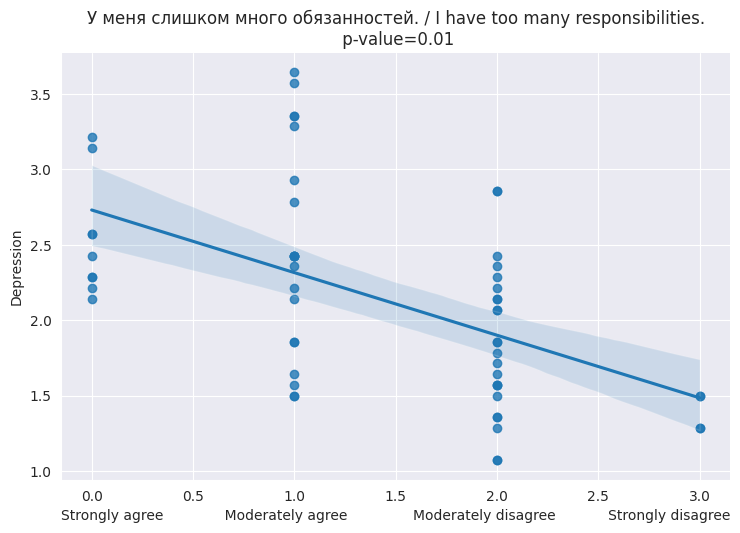

In [25]:
st = str(X.columns.tolist()[4])
lmplot(x=st,
       y="DSM IV",
       data=DataFrame(data={st: X[st],
                            "DSM IV": y["DSM IV"]}),
       height=5,
       aspect=1.5)
xlabel('Strongly agree              Moderately agree               Moderately disagree            Strongly disagree')
ylabel('Depression')
title(st + "\n p-value=" + str(round(p[st],2)))

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Я не доверяю людям в этой стране. / I do not trust the people of this country.\n p-value=0.07')

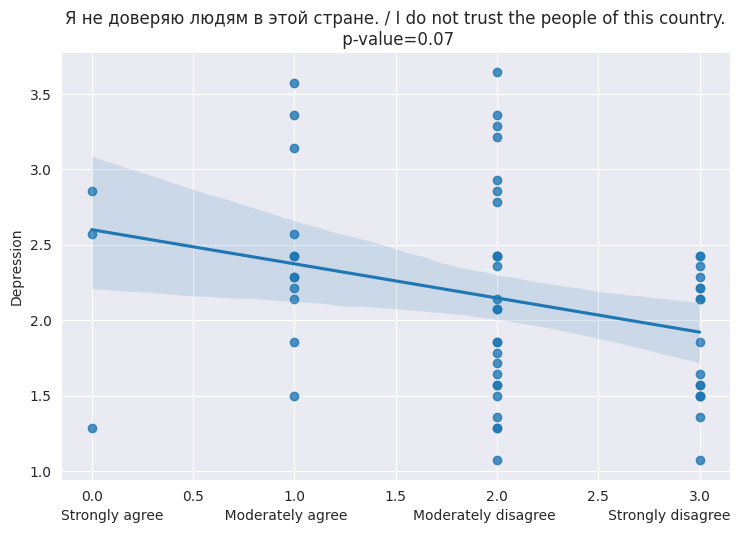

In [26]:
feature = str(X.columns.tolist()[0])
lmplot(x=feature,
       y="DSM IV",
       data=DataFrame(data={feature: X[feature],
                            "DSM IV": y["DSM IV"]}),
       height=5,
       aspect=1.5)
xlabel('Strongly agree              Moderately agree               Moderately disagree            Strongly disagree')
ylabel('Depression')
title(feature + "\n p-value=" + str(round(p[feature],2)))

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Я чувствую как будто я бросил свою семью. / I feel like I have abandoned my family.\n p-value=0.05')

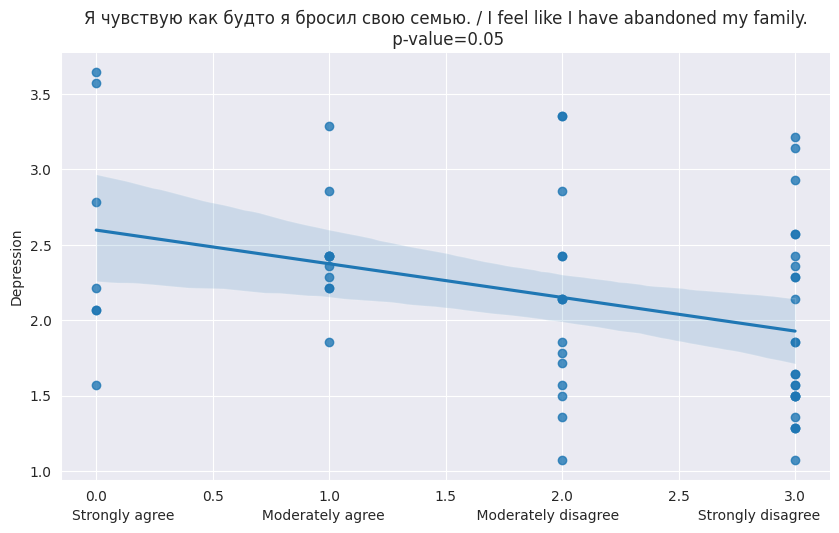

In [27]:
feature = str(X.columns.tolist()[14])
lmplot(x=feature,
       y="DSM IV",
       data=DataFrame(data={feature: X[feature],
                            "DSM IV": y["DSM IV"]}),
       height=5,
       aspect=1.7)
xlabel('Strongly agree                    Moderately agree                     Moderately disagree                  Strongly disagree')
ylabel('Depression')
title(feature + "\n p-value=" + str(round(p[feature],2)))